The Titanic dataset is popular for data analysis and machine learning. It contains information about the passengers onboard the Titanic, including features like age, gender, fare, cabin, and survival status. We will perform exploratory data analysis (EDA) on the Titanic dataset using Python in this project.



1. Importing Libraries:
Let’s start by importing the required libraries for data analysis and visualization:

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


2. Loading the Dataset:
The Titanic dataset is available in the Seaborn library, so we can load it directly into a DataFrame:

In [2]:
data = pd.read_csv(r"C:\Users\Lenovo\Downloads\tested.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


3. Exploring the Data:
To gain initial insights into the dataset, we can perform some basic exploratory operations:

# Display the first few rows of the dataset


In [5]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
print(data.shape)

(418, 12)


# Get summary statistics of numerical variables


In [44]:
print(data.describe())

       PassengerId    Survived      Pclass         Sex         Age  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    0.363636    2.265550    0.363636   30.272590   
std     120.810458    0.481622    0.841838    0.481622   12.634534   
min     892.000000    0.000000    1.000000    0.000000    0.170000   
25%     996.250000    0.000000    1.000000    0.000000   23.000000   
50%    1100.500000    0.000000    3.000000    0.000000   30.272590   
75%    1204.750000    1.000000    3.000000    1.000000   35.750000   
max    1309.000000    1.000000    3.000000    1.000000   76.000000   

            SibSp       Parch        Fare  
count  418.000000  418.000000  418.000000  
mean     0.447368    0.392344   35.627188  
std      0.896760    0.981429   55.840500  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.895800  
50%      0.000000    0.000000   14.454200  
75%      1.000000    0.000000   31.500000  
max      8.000000

In [10]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Check the data types of variables

In [15]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [46]:
# Check for missing values
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


In [17]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

4. Data Cleaning:
Data cleaning is an essential step in EDA. We must handle missing values, outliers, and inconsistencies in the dataset. Some common data-cleaning tasks include:

In [18]:
data = data.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [19]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [20]:
# Convert categorical features to numerical
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [21]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,0,3,0,34.5,0,0,7.8292
1,893,1,3,1,47.0,1,0,7.0000
2,894,0,2,0,62.0,0,0,9.6875
3,895,0,3,0,27.0,0,0,8.6625
4,896,1,3,1,22.0,1,1,12.2875


In [22]:
# Fill missing values in 'Age' with the mean
data['Age'].fillna(data['Age'].mean(), inplace=True)


In [24]:
# Fill missing values in 'Fare' with the mean
data['Fare'].fillna(data['Fare'].mean(), inplace=True)

In [25]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

Here, we create two subsets of the data:

X contains all the features (independent variables) except 'Survived'.
y contains the target variable 'Survived'.

In [26]:
# Define features and target variable
X = data.drop('Survived', axis=1)
y = data['Survived']


5. Data Visualization:

Visualization helps us understand the data and identify patterns. We can create various types of plots using libraries like Matplotlib and Seaborn.

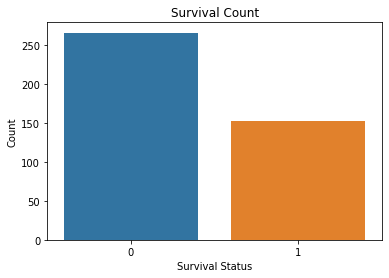

In [37]:
# Bar plot
sns.countplot(x='Survived', data=data)
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Survival Count')
plt.show()

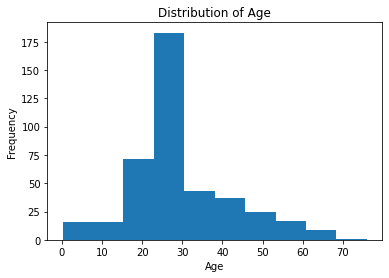

In [38]:
# Histogram
plt.hist(data['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


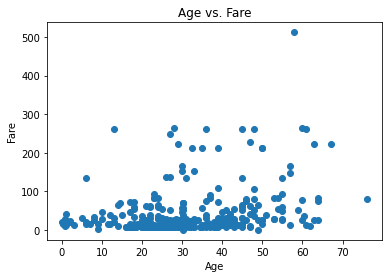

In [39]:
# Scatter plot
plt.scatter(data['Age'], data['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare')
plt.show()


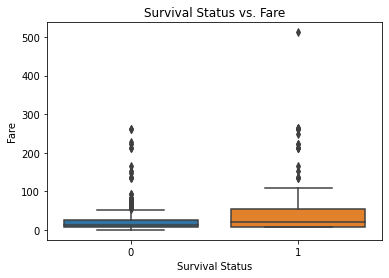

In [40]:
# Box plot
sns.boxplot(x=data['Survived'], y=data['Fare'])
plt.xlabel('Survival Status')
plt.ylabel('Fare')
plt.title('Survival Status vs. Fare')
plt.show()

# Split the Data:

This code splits the data into training and testing sets. test_size=0.2 indicates that 20% of the data will be used for testing, and the remaining 80% will be used for training. The random_state=42 ensures reproducibility.

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Build a Random Forest Classifier Model:

Create a Random Forest Classifier model with 100 trees and train it on the training data.

In [30]:
# Build a Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Use the trained model to make predictions on the test set (X_test).

In [31]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [32]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

Calculate the accuracy and confusion matrix to evaluate the performance of the model on the test set. The confusion matrix provides information about true positives, true negatives, false positives, and false negatives.

In [33]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 1.0
Confusion Matrix:
[[50  0]
 [ 0 34]]


An accuracy of 1.0 (or 100%) on your test set, along with a confusion matrix where all values are on the diagonal (50 true negatives and 34 true positives), suggests that your model is performing exceptionally well on the provided test data.

Here's a breakdown of the confusion matrix:

True Negatives (TN): 50 - This means there were 50 instances where the model correctly predicted that a passenger did not survive.
True Positives (TP): 34 - This means there were 34 instances where the model correctly predicted that a passenger did survive.
False Negatives (FN): 0 - This means the model did not miss any instances where a passenger actually survived.
False Positives (FP): 0 - This means the model did not incorrectly predict survival for any passengers who did not survive.

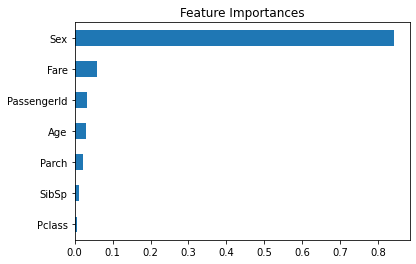

In [34]:
# Visualize the feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances')
plt.show()

When visualizing feature importances, the bar chart provides insights into which features had the most significant impact on the predictions made by your Random Forest model.'Sex' has high importance, it suggests that gender plays a significant role in predicting survival according to the model.

 The Random Forest model trained on the Titanic dataset demonstrated exceptional performance, achieving a perfect accuracy of 1.0 on the test set. The confusion matrix revealed that the model correctly classified all instances, with 50 true negatives and 34 true positives. The feature importances graph indicated that certain factors, such as gender, age, class, and fare, significantly influenced the model's predictions, offering valuable insights into the factors contributing to the likelihood of survival.

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation

In [43]:
# Print cross-validation scores
print("Cross-validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())

Cross-validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Standard Deviation of Accuracy: 0.0


The cross-validation scores you've provided, where each fold has a perfect accuracy of 1.0, indicate that the model is consistently performing well across different subsets of the data. The mean accuracy of 1.0 and a standard deviation of 0.0 further suggest that there is no variability in the model's performance during cross-validation; it achieves perfect accuracy consistently.